In [371]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [372]:
dataset = pd.read_csv('insurance.csv')


X = dataset.iloc[:,:6].values
Y = dataset.iloc[:,-1].values

In [373]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [374]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [375]:
X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [376]:
# Categorical values:
X[ : ,1]

array(['female', 'male', 'male', ..., 'female', 'female', 'female'],
      dtype=object)

In [377]:
X[:,4]

array(['yes', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)

In [378]:
X[:,5]

array(['southwest', 'southeast', 'southeast', ..., 'southeast',
       'southwest', 'northwest'], dtype=object)

In [379]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [385]:
# sns.pairplot(dataset,hue='smoker')
transformer = make_column_transformer(
    (OneHotEncoder(), ['sex','smoker','region']),
    remainder='passthrough')

In [387]:
transformed = transformer.fit_transform(dataset)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

In [388]:
transformed_df

,onehotencoder__sex_female,onehotencoder__sex_male,onehotencoder__smoker_no,onehotencoder__smoker_yes,onehotencoder__region_northeast,onehotencoder__region_northwest,onehotencoder__region_southeast,onehotencoder__region_southwest,remainder__age,remainder__bmi,remainder__children,remainder__charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32.0,28.880,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,50.0,30.970,3.0,10600.54830
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,18.0,31.920,0.0,2205.98080
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,36.850,0.0,1629.83350
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,21.0,25.800,0.0,2007.94500


In [389]:
X = transformed_df.iloc[ : , :-1].values
Y = transformed_df.iloc[ : ,  -1 ].values

In [390]:
X = X[: , 1:]

In [391]:
# X[: , 1:]

In [392]:
# X[:,1:]

In [393]:
# X = X[: , 1:]

In [394]:
X


array([[ 0.  ,  0.  ,  1.  , ..., 19.  , 27.9 ,  0.  ],
       [ 1.  ,  1.  ,  0.  , ..., 18.  , 33.77,  1.  ],
       [ 1.  ,  1.  ,  0.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 0.  ,  1.  ,  0.  , ..., 18.  , 36.85,  0.  ],
       [ 0.  ,  1.  ,  0.  , ..., 21.  , 25.8 ,  0.  ],
       [ 0.  ,  0.  ,  1.  , ..., 61.  , 29.07,  0.  ]])

In [395]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [396]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [397]:
y_pred = regressor.predict(X_test)

In [398]:
Y_test

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

In [399]:
y_pred 

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

In [400]:
X_test

array([[ 1.   ,  1.   ,  0.   , ..., 52.   , 30.2  ,  1.   ],
       [ 0.   ,  1.   ,  0.   , ..., 47.   , 29.37 ,  1.   ],
       [ 1.   ,  0.   ,  1.   , ..., 48.   , 40.565,  2.   ],
       ...,
       [ 1.   ,  1.   ,  0.   , ..., 57.   , 40.28 ,  0.   ],
       [ 0.   ,  0.   ,  1.   , ..., 30.   , 39.05 ,  3.   ],
       [ 1.   ,  1.   ,  0.   , ..., 46.   , 24.795,  3.   ]])

In [401]:
Y_test

array([ 9724.53    ,  8547.6913  , 45702.02235 , 12950.0712  ,
        9644.2525  ,  4500.33925 ,  2198.18985 , 11436.73815 ,
        7537.1639  ,  5425.02335 ,  6753.038   , 10493.9458  ,
        7337.748   ,  4185.0979  , 18310.742   , 10702.6424  ,
       12523.6048  ,  3490.5491  ,  6457.8434  , 33475.81715 ,
       23967.38305 , 12643.3778  , 23045.56616 , 23065.4207  ,
        1674.6323  ,  4667.60765 ,  3732.6251  ,  7682.67    ,
        3756.6216  ,  8413.46305 ,  8059.6791  , 48970.2476  ,
       12979.358   , 20630.28351 , 14571.8908  ,  4137.5227  ,
        8347.1643  , 51194.55914 , 40003.33225 ,  1880.487   ,
        5458.04645 ,  2867.1196  , 20149.3229  , 47496.49445 ,
       36149.4835  , 26018.95052 , 19749.38338 ,  6940.90985 ,
        4718.20355 , 22192.43711 ,  2899.48935 , 18838.70366 ,
       23568.272   , 46255.1125  , 24227.33724 ,  3268.84665 ,
        2322.6218  ,  8827.2099  , 14478.33015 , 13112.6048  ,
        1253.936   , 46718.16325 , 13919.8229  ,  9630.

In [404]:
score  = regressor.score(X_test,y_pred)

In [405]:
score

1.0

In [406]:
type(y_pred)

numpy.ndarray

In [426]:
regressor.score = 

<bound method RegressorMixin.score of LinearRegression()>

In [409]:
data_frame_compare = pd.DataFrame({'Y_test':Y_test, 'y_pred':y_pred})

In [410]:
data_frame_compare

,Y_test,y_pred
0,9724.53000,11169.927119
1,8547.69130,9486.709085
2,45702.02235,38181.123053
3,12950.07120,16266.313289
4,9644.25250,6914.648007
...,...,...
263,15019.76005,14760.230968
264,6664.68595,8277.984346
265,20709.02034,16149.973370
266,40932.42950,32904.758143


In [413]:
data_frame_compare.corr()
# help(sns.heatmap)

,Y_test,y_pred
Y_test,1.000000,0.895541
y_pred,0.895541,1.000000


<AxesSubplot:>

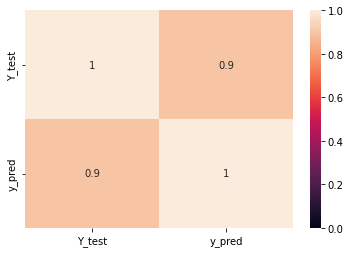

In [425]:
sns.heatmap(data_frame_compare.corr(),vmin=0,vmax=1,annot=True)

In [226]:
y_pred

array([ 7498.02836991,  7782.61844306, 36195.85325476, 10976.666429  ,
        3110.43888653,  4666.92873611,  6810.78837748, 12216.64003885,
        9770.56610295,  9922.25277065,  5756.37471914,  7575.61163528,
        7566.19126243,  5163.80986828, 30187.77233105,  8532.13556125,
        5407.14423649,  9684.27620674,  8592.83215723, 31479.67979281,
       29948.95674153, 10586.16417178,  8617.11989938, 29682.99524258,
        8724.1550329 , 11603.50344876,  3235.7572404 , 10449.38217659,
        5730.26909554,  9082.04694441,  9168.45559565, 35382.83732814,
        9735.71638689,  9696.10385352, 27640.0662679 ,  7450.53079149,
       11695.93527342, 33078.82963865, 33297.0373975 ,  8298.60301117,
        4251.81872146,  6414.74433714, 29786.24399103, 34765.84079992,
       33256.045753  , 10134.5812913 ,  8401.41420111,  6811.82866332,
        5694.13505501,  5647.50289416, 10197.65998104,  8867.400342  ,
       29751.37683515, 36031.26119281, 12135.61574227, 10236.45092863,
      

In [415]:
regressor.coef_

array([   -15.46372787, -11802.50863374,  11802.50863374,    483.84006818,
          223.70733587,   -429.43876573,   -278.10863831,    253.7004996 ,
          335.96281427,    436.9101206 ])

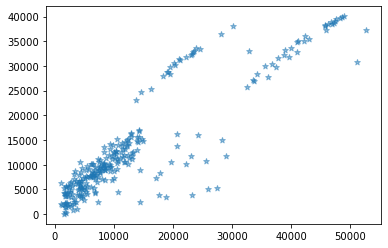

In [424]:
plt.scatter(Y_test, y_pred,marker='*',alpha=0.5)